In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
dataset = sns.load_dataset('titanic')
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: ylabel='Density'>

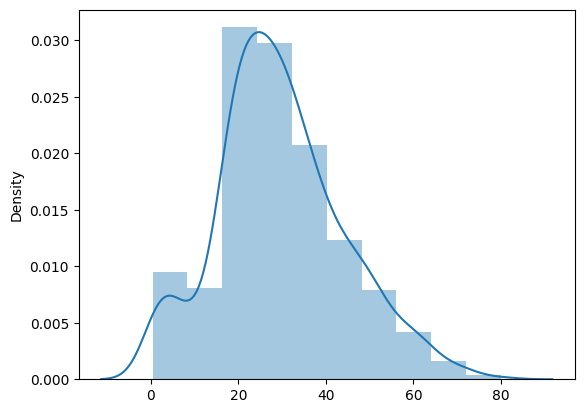

In [11]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(x = dataset['age'], bins = 10)

<Axes: xlabel='age'>

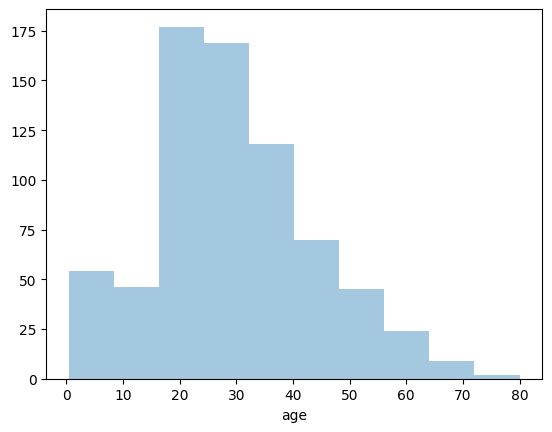

In [12]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(dataset['age'], bins = 10,kde=False)

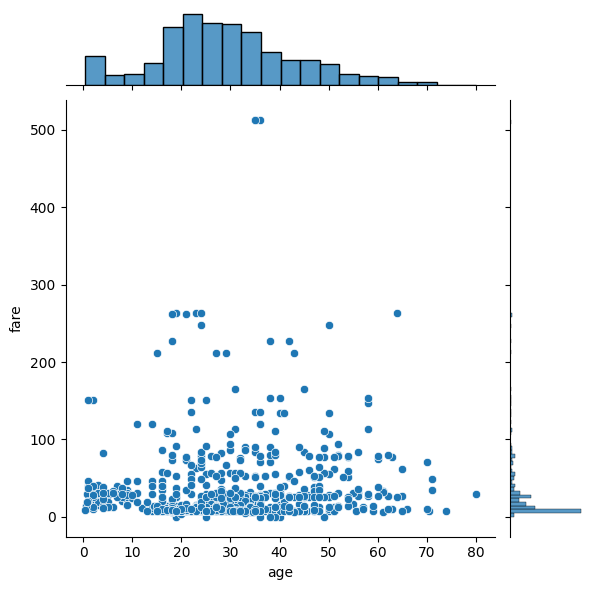

In [13]:
# For Plot 1
sns.jointplot(x = dataset['age'], y = dataset['fare'], kind ='scatter')

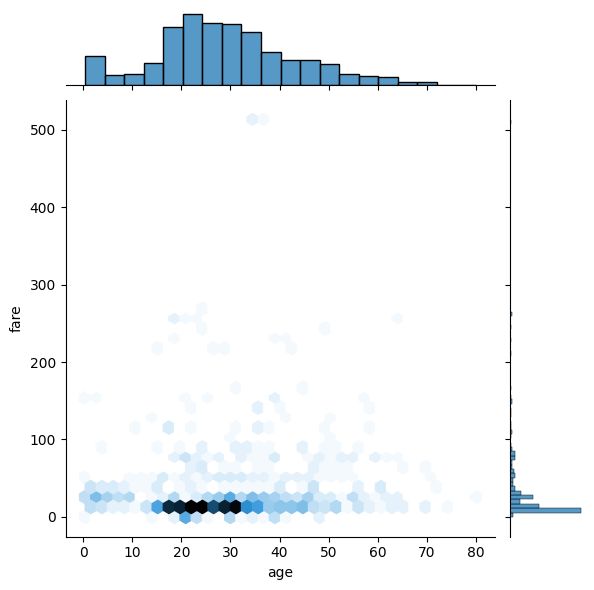

In [14]:
# For Plot 2
sns.jointplot(x = dataset['age'], y = dataset['fare'], kind = 'hex')

<Axes: xlabel='fare'>

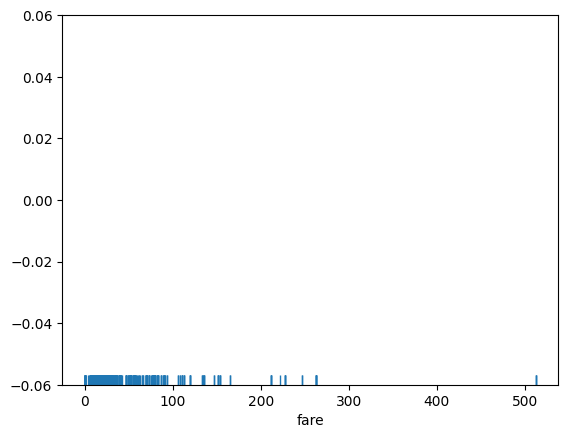

In [16]:
sns.rugplot(dataset['fare'])

<Axes: xlabel='sex', ylabel='age'>

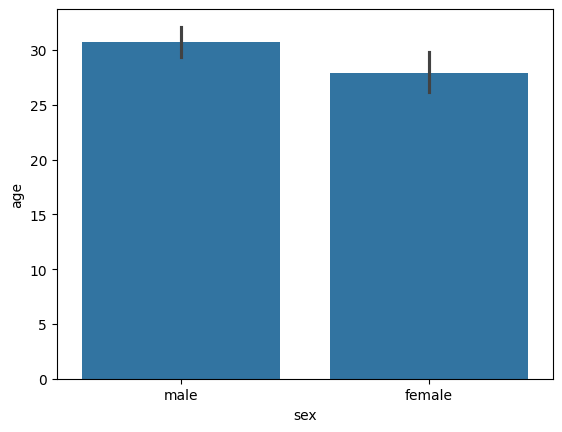

In [17]:
sns.barplot(x='sex', y='age', data=dataset)


<Axes: xlabel='sex', ylabel='age'>

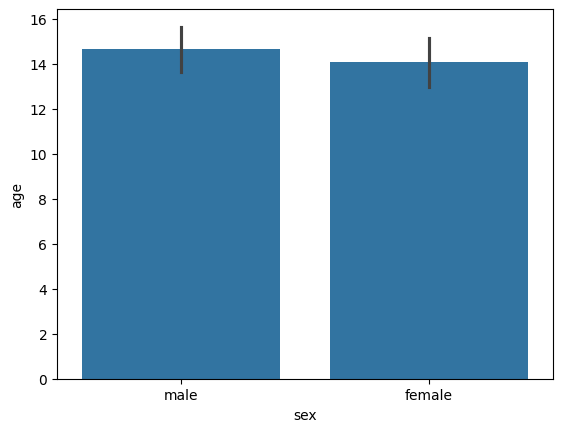

In [18]:
sns.barplot(x='sex', y='age', data=dataset, estimator=np.std)

<Axes: xlabel='sex', ylabel='count'>

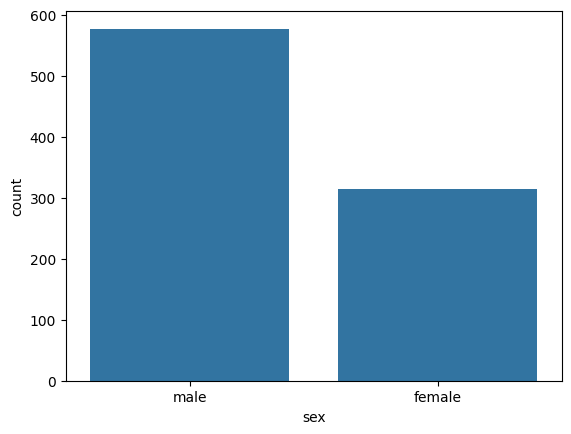

In [19]:
sns.countplot(x='sex', data=dataset)


<Axes: xlabel='sex', ylabel='age'>

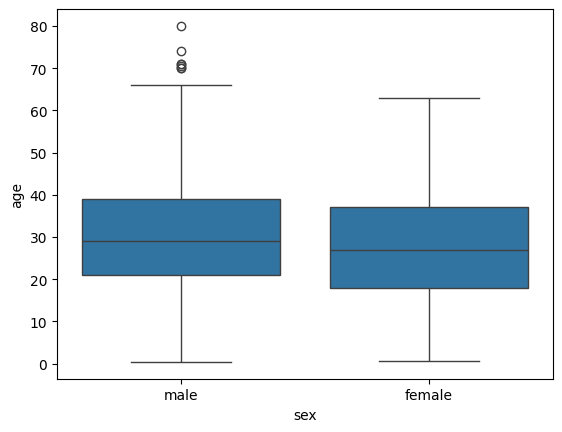

In [20]:
sns.boxplot(x='sex', y='age', data=dataset)

<Axes: xlabel='sex', ylabel='age'>

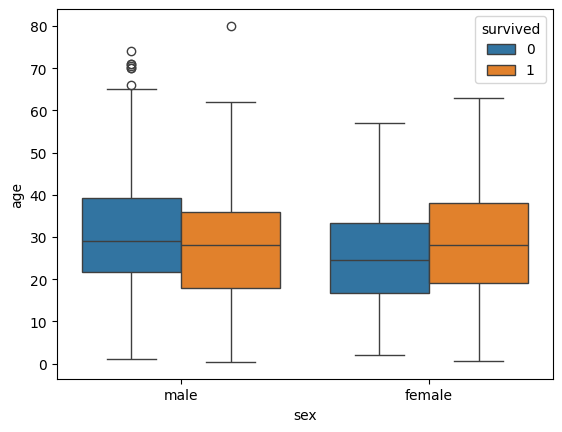

In [21]:
sns.boxplot(x='sex', y='age', data=dataset, hue="survived")

<Axes: xlabel='sex', ylabel='age'>

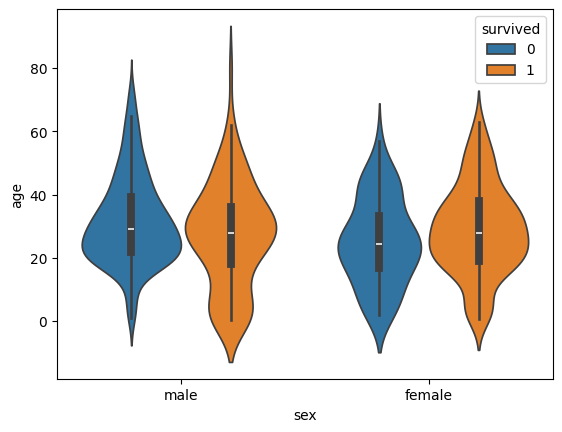

In [22]:
sns.violinplot(x='sex', y='age', data=dataset, hue='survived')

<Axes: xlabel='sex', ylabel='age'>

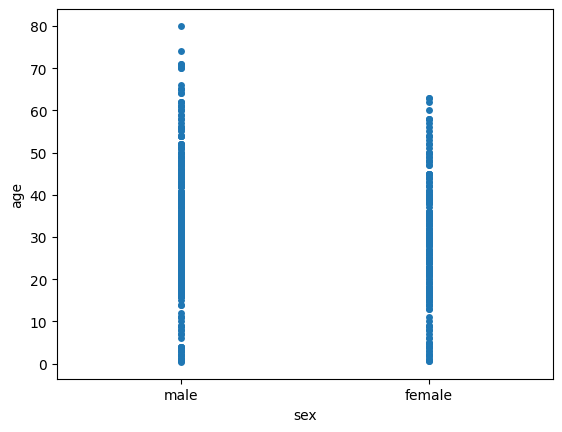

In [23]:
sns.stripplot(x='sex', y='age', data=dataset, jitter=False)


<Axes: xlabel='sex', ylabel='age'>

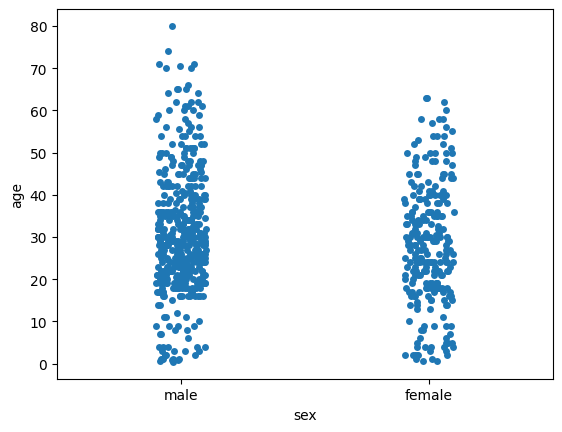

In [24]:
sns.stripplot(x='sex', y='age', data=dataset, jitter=True)

<Axes: xlabel='sex', ylabel='age'>

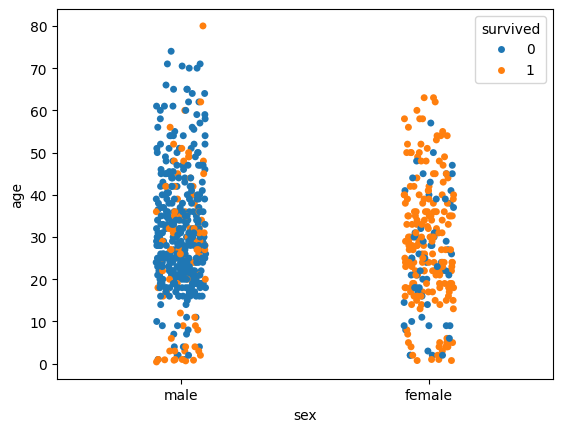

In [27]:
sns.stripplot(x='sex', y='age', data=dataset, jitter=True, hue='survived')

<Axes: xlabel='sex', ylabel='age'>

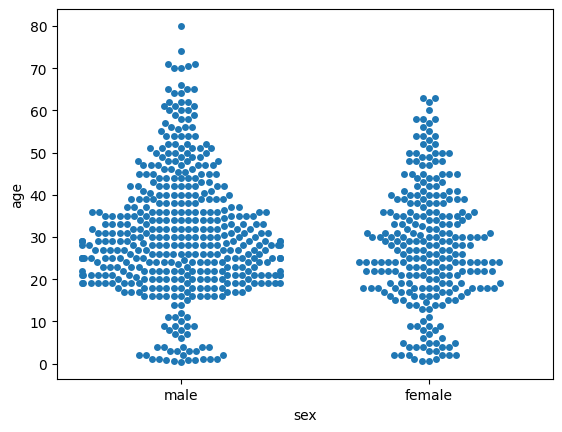

In [28]:
sns.swarmplot(x='sex', y='age', data=dataset)

<Axes: xlabel='sex', ylabel='age'>

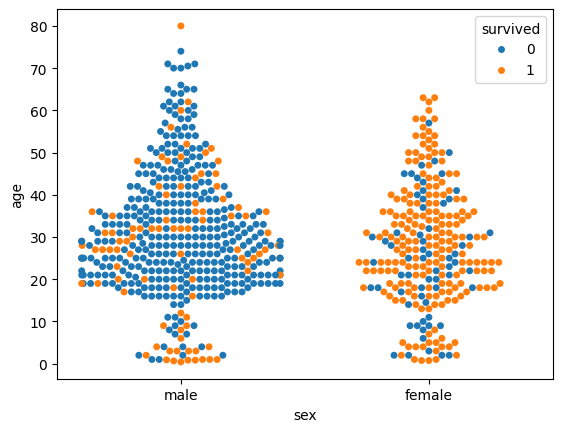

In [29]:
sns.swarmplot(x='sex', y='age', data=dataset, hue='survived')

In [30]:
dataset = sns.load_dataset('titanic')
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
dataset.select_dtypes(include=['number']).corr()


,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [32]:
print(dataset.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [33]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for col in dataset.select_dtypes(include=['object','category']).columns:
    dataset[col] = label_enc.fit_transform(dataset[col])

In [34]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
dataset['sex'] = label_enc.fit_transform(dataset['sex'])
print(dataset.corr())

             survived    pclass       sex       age     sibsp     parch  \
survived     1.000000 -0.338481 -0.543351 -0.077221 -0.035322  0.081629   
pclass      -0.338481  1.000000  0.131900 -0.369226  0.083081  0.018443   
sex         -0.543351  0.131900  1.000000  0.093254 -0.114631 -0.245489   
age         -0.077221 -0.369226  0.093254  1.000000 -0.308247 -0.189119   
sibsp       -0.035322  0.083081 -0.114631 -0.308247  1.000000  0.414838   
parch        0.081629  0.018443 -0.245489 -0.189119  0.414838  1.000000   
fare         0.257307 -0.549500 -0.182333  0.096067  0.159651  0.216225   
embarked    -0.163517  0.157112  0.104057 -0.025252  0.066654  0.038322   
class       -0.338481  1.000000  0.131900 -0.369226  0.083081  0.018443   
who          0.325753 -0.196793 -0.639773  0.378685 -0.136003 -0.055682   
adult_male  -0.557080  0.094035  0.908578  0.280328 -0.253586 -0.349943   
deck        -0.294804  0.743251  0.118282 -0.267987  0.041333 -0.031308   
embark_town -0.163517  0.

In [35]:
dataset.corr()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.163517,-0.338481,0.325753,-0.557080,-0.294804,-0.163517,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.157112,1.000000,-0.196793,0.094035,0.743251,0.157112,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.104057,0.131900,-0.639773,0.908578,0.118282,0.104057,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.025252,-0.369226,0.378685,0.280328,-0.267987,-0.025252,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.066654,0.083081,-0.136003,-0.253586,0.041333,0.066654,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.038322,0.018443,-0.055682,-0.349943,-0.031308,0.038322,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.221226,-0.549500,0.146290,-0.182024,-0.525994,-0.221226,0.257307,-0.271832
embarked,-0.163517,0.157112,0.104057,-0.025252,0.066654,0.038322,-0.221226,1.000000,0.157112,-0.060177,0.088725,0.191735,1.000000,-0.163517,0.065610
class,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.157112,1.000000,-0.196793,0.094035,0.743251,0.157112,-0.338481,0.135207
who,0.325753,-0.196793,-0.639773,0.378685,-0.136003,-0.055682,0.146290,-0.060177,-0.196793,1.000000,-0.437532,-0.153766,-0.060177,0.325753,0.006540


<Axes: >

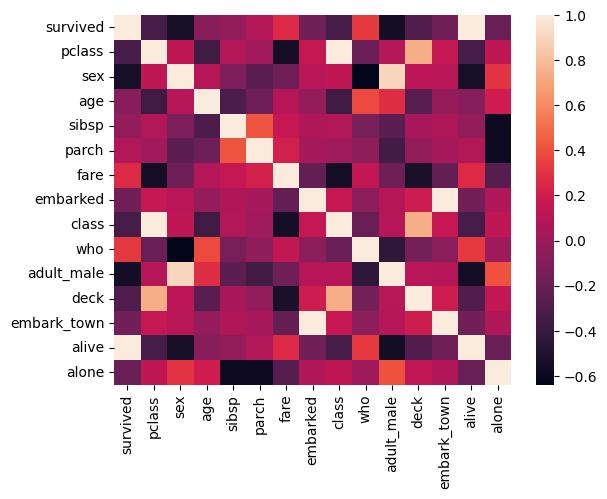

In [36]:
corr = dataset.corr()
sns.heatmap(corr)

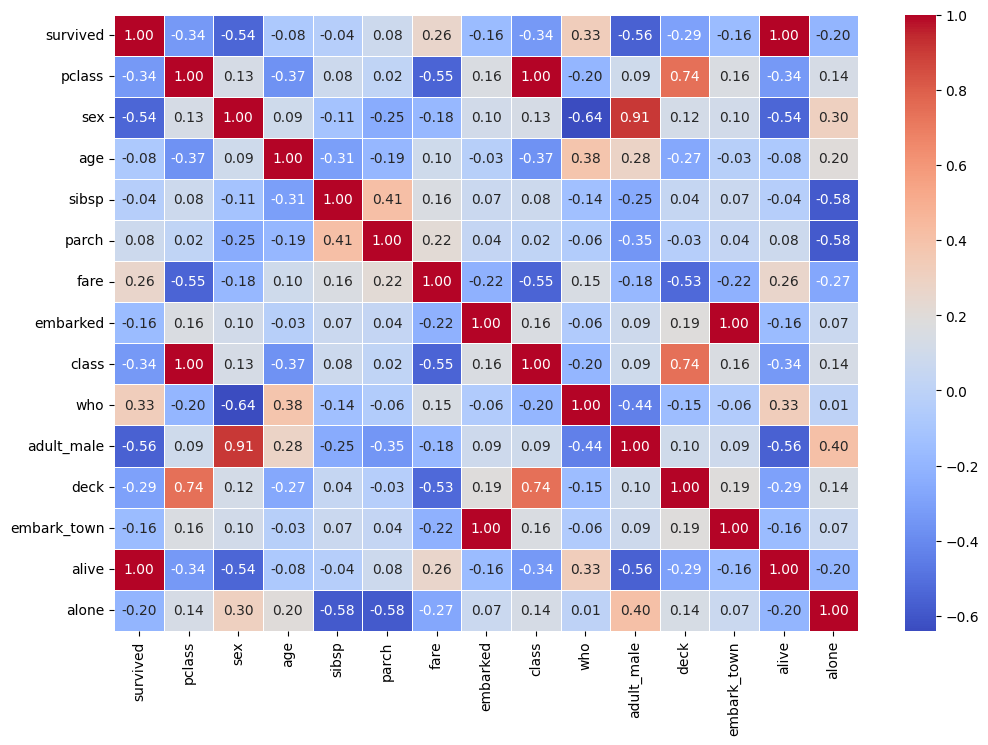

In [37]:
# Create the heatmap with better formatting
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(),
            annot=True, # Show correlation values
            fmt=".2f", # Limit values to 2 decimal places
            cmap="coolwarm", # Choose a better color scheme
            linewidths=0.5, # Add space between cells
            annot_kws={"size": 10}) # Adjust font size for better readability
plt.show()

<Axes: >

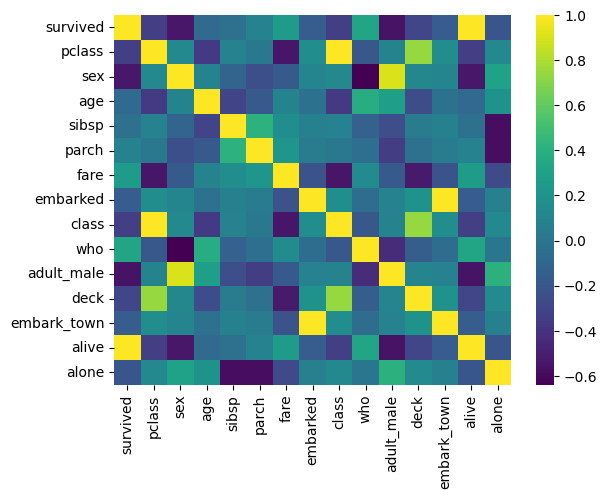

In [38]:
corr = dataset.corr()
sns.heatmap(corr, cmap='viridis')

<Axes: xlabel='fare', ylabel='Count'>

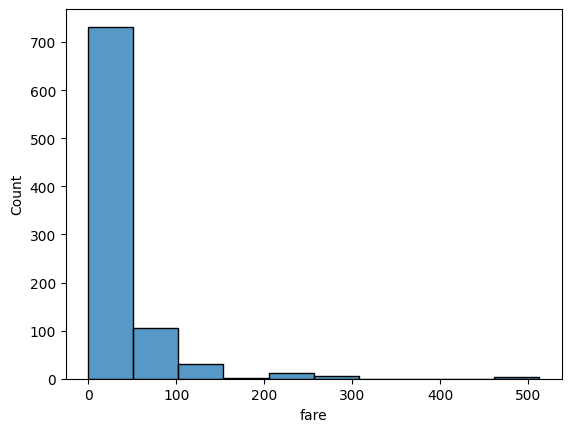

In [39]:
sns.histplot(dataset['fare'], kde=False, bins=10)